# Redes Neurais Convolucionais
Nesse tutorial vamos falar sobre um tipo diferente de redes neurais: as redes neurais convolucionais (CNNs, do inglês Convolutional Neura Networks).

Um dos usos mais populares para CNNs é (discutivelmente) o processamento de imagens.  Elas são usadas pra reconhecer o tipo da imagem, encontrar objetos espefícicos nela, desenhar o contorno desses objetos e até gerar novas imagens com base em outras.

Nessa aula vamos aprender como funciona as CNNs e como usá-as para reconhecer o tipo da imagem. Em outras palavras, vamos fazer **classificação de imagens**. Para isso, usaremos uma nova biblioteca: **Keras**. Keras é certamente uma das bibliotecas mais simples e mais usadas para criar CNNs e outros tipos de deep learning e por isso usaremos para facilitar o aprendizado.


# 1. Por que classificar imagens é complicado?
Nós, seres humanos, num piscar de olhos, conseguimos identificar os objetos que nos rodeiam. Para isso, nosso cérebro se basea em experiências visuais passadas e generaliza para novas, mesmo que os objetos estejam em cores, formas e posições diferentes, em ambientes novos e com iluminação diferente. Infelizmente, para as máquinas não é tão simples assim.

<figure style="text-align: center;" >
      <a name="O que vemos e o que o computador vê" />
      <center>
        <img  alt="O que vemos e o que o computador vê" src="https://adeshpande3.github.io/assets/Corgi3.png">
        <figcaption> O que vemos e o que o computador vê. Fonte: <cite data-cite="Deshpande2017"><a href="https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/">(Deshpande, 2017)</a>
        </figcaption>
      </center>
</figure>

Quando um computador vê uma imagem, ele verá na verdade uma matriz de valores de pixel. Esses números, embora para nós possam não fazer sentido, são as únicas entradas disponíveis para o computador. Pior ainda: as menores mudanças na imagem, sejam em posição, forma, cor, iluminação... podem mudar completamente esses números.

# 2. Como as CNNs podem ajudar?
Sabendo que o ser humano classifica bem as imagens, as CNNs buscaram inspiração em nosso sistema visual. Quando olhamos para uma foto de um cachorro, nós o identificamos ao perceber que ele tem quatro patas, orelhas, focinho, etc. De maneira semelhante, uma CNN é capaz de fazer isso procurando por padrões simples, como bordas e curvas. Então ela combina esses padrões para formar outros mais complexos, como formas e texturas e depois combina esses em outros ainda mais complexos... e logo temos padrões complexos o suficiente para identificar o cachorro. 

Para a CNN aprender esses padrões, a primeira coisa que precisamos é de um dataset. Vamos utilizar o dataset mnist, que contém imagens de dígitos. Em aprendizado supervisionado de classificação, cada amostra de um dataset precisa de um valor que a identifique (label). No mnist não é diferente: cada imagem possui uma label que diz qual dígito está desenhado na imagem. 

Using TensorFlow backend.


Quantidade de imagens de treino: 45000
Quantidade de imagens de validação: 15000
Quantidade de imagens de test: 10000


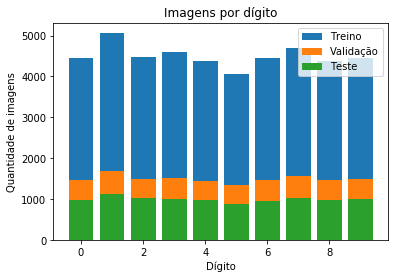

In [0]:
# Preparando o dataset para aprendizado de máquina

# Baixando o dataset mnist
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dividindo o dataset de treino em treino e validação de forma balanceada
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.25)


# Checando quantidade de imagens do dataset
print('Quantidade de imagens de treino:', x_train.shape[0])
print('Quantidade de imagens de validação:', x_val.shape[0])
print('Quantidade de imagens de test:', x_test.shape[0])

# Contando quantidade de imagens por dígito
import collections
counterTrain=collections.Counter(y_train)
counterVal=collections.Counter(y_val)
counterTest=collections.Counter(y_test)

# Plotando quantidade de imagens de cada dígito
from matplotlib import pyplot

fig, ax = pyplot.subplots()
rects1 = ax.bar(counterTrain.keys(), counterTrain.values(), label='Treino')
rects2 = ax.bar(counterVal.keys(), counterVal.values(), label='Validação')
rects3 = ax.bar(counterTest.keys(), counterTest.values(), label='Teste')

ax.set_title('Imagens por dígito')
ax.set_ylabel('Quantidade de imagens')
ax.set_xlabel('Dígito')
ax.legend()
pyplot.show()

Agora que temos um dataset, é preciso formatá-lo para que a API do Keras possa entendê-lo.

In [0]:
# Formatando o dataset para funcionar como entrada do Keras

# As imagens de entradas precisam estar em um array de 4 dimensões
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Cada imagem precisa ter dimensão x, y e z
input_shape = (28, 28, 1)

# Convertento valores dos pixels para float (garantindo precisão em operações de divisão por exemplo)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# Normalizando os valores dos pixels (valores entre 0 e 1).
x_train /= 255
x_val /= 255
x_test /= 255

# 3. Montando uma CNN
Para encontrar padrões e combiná-los sucessivamente, uma CNN utiliza um conjunto de operações em sequência. Essa operações são explicadas a seguir.

## 3.1 Convolução
O objetivo principal da convolução é extrair características da imagem de entrada. 

Considere uma primeira imagem 5 x 5, chamada de entrada. Também considere uma segunda imagem 3 x 3, chamada de filtro. Então a convolução da entrada por um filtro é computada assim:

<figure style="text-align: center;" >
      <a name="Convolução de uma entrada 5x5 por um filtro 3x3" />
      <center>
          <img  alt="Convolução de uma entrada 5x5 por um filtro 3x3" src="https://cdn-images-1.medium.com/max/800/0*KdJv2eWBC1qUs3Po" >
          <figcaption> Convolução de uma entrada 5x5 por um filtro 3x3. Fonte: <cite data-cite="Agarwal2018"><a href="https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd">(Agarwal, 2018)</a></cite>
        </figcaption>
      </center>
</figure>

A imagem 3 x 3 resultante dessa convolução é chamada de mapa de características. Nela, os pixels de maiores valores representam as vizinhanças 3 x 3 da entrada que tiveram os valores mais semelhantes aos valores do filtro. 

Nesse exemplo, convoluímos com apenas um filtro, mas normalmente aplica-se vários. Se aplicarmos, por exemplo, 5 filtros, nosso mapa de características será composto de 5 imagens 3 x 3, ou uma imagem 3 x 3 x 5.

## 3.2 Função de Ativação

Normalmente, após a convolução, aplica-se uma função de ativação. A função de ativação mais utilizada em CNNs é a ReLU (rectified linear unit) e é definida como: f (x) = max (0, x). Se x> 0, os valores do mapa de características permanecem iguais, e se x <0, ele corta detalhes desnecessários.

<figure style="text-align: center;" >
      <a name="Função de ativação ReLU" />
      <center>
          <img  alt="Função de ativação ReLU" src="https://www.researchgate.net/profile/Leo_Pauly/publication/319235847/figure/fig3/AS:537056121634820@1505055565670/ReLU-activation-function.png" >
      </center>
</figure>

## 3.3 Pooling
O pooling reduz a dimensionalidade do mapa de características, mas retém as informações mais importantes. 

<figure style="text-align: center;" >
      <a name="Maxpooling 2x2 em uma entrada 4x4" />
      <center>
          <img  alt="Maxpooling 2x2 em uma entrada 4x4" src="https://cdn-images-1.medium.com/max/800/1*oVOUhBIi59Gb5w7eBzqYuA.png">
          <figcaption> Maxpooling 2x2 em uma entrada 4x4. Fonte: <cite data-cite="Yalçin2018"><a href="https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d">(Yalçin, 2018)</a></cite>
        </figcaption>
      </center>
</figure>

Na figura, utilizamos o Max Pooling 2 x 2. Nele, ficamos apenas com os maiores valores de cada vizinhança 2 x 2 dentro da imagem. Mas também podemos obter a média (Average Pooling) ou outra operação que desejarmos. Na prática, o Max Pooling geralmente funcionar melhor.

## 3.4 Flatten e MLP
Na operação Flatten, o mapa de características é convertido em um vetor. Normalmente, aplica-se essa operação para que o mapa de características possa ser usado como entrada de uma rede neural comum, ou seja, um Multilayer Perceptron (MLP).

<figure style="text-align: center;" >
      <a name="Flatten seguido de uma MLP" />
      <center>
          <img  alt="Flatten seguido de uma MLP" src="https://camo.githubusercontent.com/de4ac4d9cea5750785f86b1a8dd7cf511c9d9a3d/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f646c2f6c617267652d616e6e2d66726f6d2d636e6e2e706e67">
          <figcaption> Flatten seguido de uma MLP. Fonte: <cite data-cite="Partridge2018"><a href="https://github.com/Achronus/Machine-Learning-101/wiki/Convolutional-Neural-Networks-(CNN)">(Partridge, 2018)</a></cite>
        </figcaption>
      </center>
</figure>

O MLP se comportará como deve: as usará as características de entrada para aprender e, posteriormente, reconhecer as imagens. Podemos experimentar qualquer de neurônios em suas camadas. No entanto, para a mnist, a camada final deve ter 10 neurônios, pois temos 10 classes numéricas (0, 1, 2,…, 9).

## 3.5 Dropout

Redes muito complexas tendem a gerar modelos igualmente complexos. Comumente, esses modelos são formados sob forte influência de apenas um subconjunto de neurônios em detrimento dos demais. Em situações como essa, esse subconjunto cria relacionamentos muito complexos, fazendo com que o modelo final sobreajuste (overfit) as imagens de treino. 

O overfitting ocorre quando o modelo treinado reconhece bem as imagens de treino, mas não tão bem assim as imagens de teste. Para tentar aliviar isso, existem métodos conhecidos como regularizações. Um dos mais utilizados em Deep Learning é o Dropout que desconsidera alguns neurônios no decorrer do treinamento.

<figure style="text-align: center;" >
      <a name="Dropout de 50%" />
      <center>
          <img  alt="Dropout de 50%" src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif" >
          <figcaption>Dropout de 50%. Fonte: <cite data-cite="Jain2018"><a href="https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/">(Jain, 2018)</a></cite>
        </figcaption>
      </center>
</figure>

No exemplo da figura, utilizou-se um dropout de 50% em uma camada. Isso significa que, a cada iteração no treinamento, cada neurônio dessa camada terá 50% de chance de ser removido e, assim, não terá influência nas próximas camadas.

O dropout evita que apenas um pequeno grupo de neurônios crie relacionamentos muito complexos e que tenham muita influência no modelo final. Para isso, ele força a rede a tentar, a cada iteração, novos relacionamentos entre alguns neurônios ao excluir os demais. Assim, cada neurônio pode contribuir um pouco para o modelo final através de relacionamentos mais simples. 

## 3.6 SoftMax

A função SoftMax converte a saída da CNN em um vetor de valores, onde cada valor é a probabilidade de a entrada da CNN ser de uma essa classe. Por exemplo: uma CNN classifica imagens como cachorro e gato. Ao receber uma imagem de um cachorro, ela infere que essa imagem tem 95% de chance de ser um cachorro e 5% chance de ser um gato.

<figure style="text-align: center;" >
      <a name="SoftMax" />
      <center>
          <img  alt="SoftMax" width="17%" src="https://camo.githubusercontent.com/82fca6566989a40f9aebac982c4aa4af765b738f/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f646c2f736f66746d61782d66756e6374696f6e2e706e67" >
      </center>
</figure>

Abaixo vamos ver como podemos criar essas operações usando o Keras.


In [0]:
# Importando Keras e suas operações
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Inicializando a CNN
model = Sequential()


# Operação de convolução com filtro 3 x 3 seguida da função de ativação ReLU
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

# Operação de Max Pooling 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Operação de convolução com filtro 3 x 3 seguida da função de ativação ReLU
model.add(Conv2D(28, kernel_size=(3,3), activation='relu'))


# Operação de flatten (convertento o mapa de características em um vetor)
model.add(Flatten())


# Camada densa com 128 nerônios seguida da função de ativação ReLU
model.add(Dense(128, activation='relu'))

# Dropout de 50% dos neurônios
model.add(Dropout(0.5))

# Camada densa de saída com 10 (um para cada dígito) seguida de função SoftMax
model.add(Dense(10,activation='softmax'))


# Resumo do modelo
model.summary();

W0701 09:17:28.277284 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 09:17:28.296580 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 09:17:28.301336 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 09:17:28.322230 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0701 09:17:28.370676 140211596105600 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3388)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               433792    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

# 4. Treinando uma CNN

Já criamos uma CNN vazia. Agora é hora de usá-la para aprender o dígitos utilizando suas imagens e labels. Primeiro, definiremos um **otimizador** que tentará iterativamente minimizar uma função de **perda**. Essa função de perda compara os valores de dígitos preditos com os respectivos valores das labels. Assim, quanto menor esse valor de perda, mais a rede predirá corretamente. Também definiremos **métrica** de eficiência para podermos dizer o quanto a rede acerta a cada época.

In [0]:
# Definindo otimizador, função de perda e métrica de eficiência. 
from keras.optimizers import Adam
adamOptimizer = Adam(lr=0.001)

model.compile( optimizer=adamOptimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'] )


# Efetuando o treinamento de 10 épocas com o dataset de treino e validando no dataset de validação
history = model.fit( x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=10, batch_size=16, shuffle=False )


# Plotando o histórico de treino

# Histórico de acurácia
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Acurácia do modelo no treino e validação')
pyplot.ylabel('Acurácia')
pyplot.xlabel('Época')
pyplot.legend(['Treino', 'Validação'], loc='upper left')
pyplot.show()

# Histórico da função de perda
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Perda do modelo no treino e validação')
pyplot.ylabel('Perda')
pyplot.xlabel('Época')
pyplot.legend(['Treino', 'Validação'], loc='upper left')
pyplot.show()

W0701 09:17:28.483190 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 09:17:28.494960 140211596105600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0701 09:17:28.602961 140211596105600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 26s 577us/step - loss: 0.2147 - acc: 0.9345 - val_loss: 0.0556 - val_acc: 0.9835
Epoch 2/10
45000/45000 [==============================] - 25s 551us/step - loss: 0.0842 - acc: 0.9746 - val_loss: 0.0471 - val_acc: 0.9872
Epoch 3/10
 1728/45000 [>.............................] - ETA: 23s - loss: 0.0768 - acc: 0.9780

KeyboardInterrupt: ignored

# 5. Avaliando a CNN treinada
Finalmente, podemos avaliar o modelo treinado usando o dataset de teste

In [0]:
# Avaliando a CNN treinada
score = model.evaluate(x_test, y_test)

print( '\nPerda:{:.3f}\nAcurácia:{}'.format( score[0], score[1] ) )


# Imprimindo uma imagem de exemplo
image_index = 4444
pyplot.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

# Predizendo o dígito dessa imagem
pred = model.predict( x_test[image_index].reshape(1, 28, 28, 1) )
print( '\nO valor predito é:', pred.argmax() )

# 6. Arquiteturas

No decorrer dos anos, arquiteturas de CNNs cada vez mais eficientes foram criadas. Vamos listar algumas delas e explicar suas melhorias.

<figure style="text-align: center;" >
      <a name="Top arquiteturas" />
      <center>
          <img  alt="Top arquiteturas" src="https://www.researchgate.net/profile/Gustav_Von_Zitzewitz/publication/324476862/figure/fig7/AS:614545865310213@1523530560584/Winner-results-of-the-ImageNet-large-scale-visual-recognition-challenge-LSVRC-of-the.png" width="70%" >
          <figcaption> Arquiteturas campeãs do ImageNet.</figcaption>
      </center>
</figure>

## 6.1 LeNet

A LeNet foi a primeira CNN criada. Ela foi utilizada para reconhecimento de dígitos em documentos e praticamente não cometia erro. A sua principal vantagem em relação aos demais algoritmos era a capacidade de encontrar características por conta própria, como toda CNN atualmente. Apesar dessa grande e inovadora habilidade e dos excelentes resultados alcançados, a LeNet não se popularizou devido ao alto custo computacional: afinal, ela foi criada em 1998!

<figure style="text-align: center;" >
      <a name="LeNet" />
      <center>
          <img  alt="Arquitetura LeNet" src="https://miro.medium.com/max/1000/1*1TI1aGBZ4dybR6__DI9dzA.png" width="80%" >
          <figcaption> Arquitetura LeNet. Fonte: <cite data-cite="LeCun1998"><a href="http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf">(LeCun et al, 1998)</a></cite>
         </figcaption>
      </center>
</figure>

## 6.2 AlexNet

Quase 15 anos após a criação da LeNet, quando os computadores já tinham avançado o suficiente, a AlexNet foi utilizada no desafio ImageNet. Ela logo parou a comunidade acadêmica ao superar o erro do campeão anterior em mais de 10%. Assim iniciou-se a revolução do Deep Learning e, a partir daí, todos os anos uma nova CNN vencia o ImageNet com resultados ainda mais incríveis. 

<figure style="text-align: center;" >
      <a name="AlexNet" />
      <center>
          <img  alt="Arquitetura AlexNet" src="https://cdn-images-1.medium.com/freeze/max/1000/1*wzflNwJw9QkjWWvTosXhNw.png?q=20" width="75%" >
          <figcaption> Arquitetura AlexNet. Fonte: <cite data-cite="Krizhevsky2012"><a href="https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf">(Krizhevsky et al, 2012)</a></cite>
         </figcaption>
      </center>
</figure>

A AlexNet propôs diversas melhorias em relação a LeNet. Primeiro, ela usa a função de ativação ReLU no lugar da Tangente Hiperbólica, que é 6 vezes mais rápida. Também propôs o uso de Dropout como regularização, evitando Overfitting. Por fim, utilizou Max Pooling no lugar de Avarage Pooling, obtendo melhores resultados. 

No ano seguinte, uma nova versão da AlexNet, contendo apenas ajustes nos hiperparâmetros, também venceu a ImageNet. 

## 6.3 VGG

A VGG foi a primeira arquitetura a superar a AlexNet propondo uma rede mais profunda: ela possui 19 camadas enquanto a AlexNet possui apenas 8! Desde então, redes cada vez mais profundas foram utilizadas para vencer a ImageNet.

<figure style="text-align: center;" >
      <a name="VGG" />
      <center>
          <img  alt="Arquitetura VGG" src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="60%" >
          <figcaption> Arquitetura VGG. Fonte: <cite data-cite="Simonyan2014"><a href="https://arxiv.org/pdf/1409.1556.pdf">(Simonyan et al, 2014)</a></cite>
         </figcaption>
      </center>
</figure>

## 6.4 GoogLeNet

Até o momento, as arquiteturas vencedoras apenas adicionavam mais e mais camadas. Em contrapartida, isso aumentava o custo computacional. A GoogLeNet, também conhecida como Inception, propôs diversos e novos truques para melhorar não apenas os resultados, mas também os tempos de treino e inferência.

<figure style="text-align: center;" >
      <a name="GoogLeNet" />
      <center>
          <img  alt="Arquitetura GoogLeNet" src="https://miro.medium.com/max/2400/1*ZFPOSAted10TPd3hBQU8iQ.png" width="100%" >
          <figcaption> Arquitetura GoogLeNet. Fonte: <cite data-cite="Szegedy2014"><a href="https://arxiv.org/pdf/1409.4842v1.pdf">(Szegedy et al, 2014)</a></cite>
         </figcaption>
      </center>
</figure>

### 6.4.1 Módulo Inception

A principal melhoria proposta pela GoogLeNet é o módulo Inception. Nele, executa-se um conjunto de convoluções paralelamente com filtros de diferentes tamanhos. Depois, os mapas de características de cada convolução são concatenados em um único mapa. 

<figure style="text-align: center;" >
      <a name="Módulo Inception" />
      <center>
          <img  alt="Módulo Inception" src="https://cdn-images-1.medium.com/max/800/1*DKjGRDd_lJeUfVlY50ojOA.png" width="50%" >
          <figcaption> Módulo Inception. Fonte: <cite data-cite="Szegedy2014"><a href="https://arxiv.org/pdf/1409.4842v1.pdf">(Szegedy et al, 2014)</a></cite>
         </figcaption>
      </center>
</figure>

Quando um filtro é pequeno ele se concentra em informações locais numa convolução. Analogamente, filtros grandes se concentram em informações mais globais. A ideia do módulo Inception é combinar informações locais e globais já que não se sabe qual importa mais em cada imagem. Isso melhora o resultado final da rede.

### 6.4.2 Filtros 1x1

Como já explicado, os mapas de características são concatenados no final do módulo Inception. O mapa resultante pode ficar muito grande, deixando operações posteriores custosas e lentas. 

Para resolver esse problema, a GoogLeNet propõe reduzir os mapas antes de concatená-los. Para isso, ela os convolui com uma quantidade pequena de filtros 1x1, resultando em novos mapas pequenos (já que aplicou-se poucos filtros). Então, um mapa de 28x28x256 convoluído por 64 filtros 1x1 resultaria em um mapa 28x28x64, por exemplo.

<figure style="text-align: center;" >
      <a name="Módulo Inception (dimensionalidade reduzida)" />
      <center>
          <img  alt="Módulo Inception (dimensionalidade reduzida)" src="https://cdn-images-1.medium.com/max/800/1*U_McJnp7Fnif-lw9iIC5Bw.png" width="50%" >
          <figcaption> Módulo Inception (dimensionalidade reduzida). Fonte: <cite data-cite="Szegedy2014"><a href="https://arxiv.org/pdf/1409.4842v1.pdf">(Szegedy et al, 2014)</a></cite>
         </figcaption>
      </center>
</figure>

### 6.4.3 Classificadores auxiliares

Normalmente, a medida que adicionamos camadas na CNN, os resultados vão melhorando. No entanto, a partir de certa profundidade, os resultados pioram muito a cada nova camada adicionada. Isso não é causado por overfitting, pois  esse aumento no erro ocorre ainda na etapa de treino. Ou seja, uma CNN rasa pode ter um erro de treino menor que o uma CNN muito profunda. Isso ocorre porque uma CNN complexa (com muitos parâmetros) é difícil de otimizar, pois o gradiente tende a desaparecer a medida que retropropaga em muitas camadas.

A GoogLeNet é profunda, maior que a VGG, possuindo 22 camadas, e por isso possui esse defeito. Para solucionar isso, ela propõe usar classificadores auxiliares no decorrer da rede. Assim, o erro final será a soma ponderada dos erros dos classificadores auxiliares e do final.

## 6.5 ResNet

Como explicado, redes cada vez mais produndas tendem a ter, a partir de certa profundidade, resultados cada vez piores. Se esse problema fosse resolvido, seria possível utilizar arquiteturas cada vez maiores e assim obter melhores resultados. A GoogLeNet amenizou esse problema propondo classificadores auxiliares. A Microsoft, por sua vez, também criou a sua própria abordagem com as Residual Neural Networks (ResNet) e, assim, conseguiu usar com sucesso arquiteturas imensas que não seriam viáveis anteriormente. 

<figure style="text-align: center;" >
      <a name="ResNet" />
      <center>
          <img  alt="Arquitetura ResNet" src="https://cdn-images-1.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png" width="100%" >
          <figcaption> Arquitetura ResNet. Fonte: <cite data-cite="He2015"><a href="https://arxiv.org/pdf/1512.03385.pdf">(He et al, 2015)</a></cite>
         </figcaption>
      </center>
</figure>

### 6.5.1 Conexões residuais

A idéia da ResNet é que camadas convolucionais alimentem “residualmente” camadas posteriores. Para isso, ela usa conexões paralelas que pulam camadas denominadas de conexões residuais. Uma conexão residual simplesmente copia um mapa de características de uma camada e concatena em outro numa camada posterior. Dessa forma, os erros retropropagados podem alcançar facilmente às primeiras camadas da rede, resolvendo o problema de resultados ruins em arquitetura grandes. 

<figure style="text-align: center;" >
      <a name="Conexão residual" />
      <center>
          <img  alt="Conexão residual" src="https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/residual_building_block.png" width="35%" >
          <figcaption> Conexão residual. Fonte: <cite data-cite="He2015"><a href="https://arxiv.org/pdf/1512.03385.pdf">(He et al, 2015)</a></cite>
         </figcaption>
      </center>
</figure>

### 6.5.2 Filtros 1x1

Como as conexões residuais concatenam mapas de características, eles podem ficar muito grandes e, assim, caros de operar. Para diminui-los, em algumas ResNets utiliza-se também as convoluções de poucos filtros 1x1, propostos pela GoogLeNet. 

<figure style="text-align: center;" >
      <a name="Conexão residual (dimensionalidade reduzida)" />
      <center>
          <img  alt="Conexão residual (dimensionalidade reduzida)" src="https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/residual_bottleneck.png" width="30%" >
          <figcaption> Conexão residual (dimensionalidade reduzida). Fonte: <cite data-cite="He2015"><a href="https://arxiv.org/pdf/1512.03385.pdf">(He et al, 2015)</a></cite>
         </figcaption>
      </center>
</figure>

### 6.5.3 Grande profundidade

Os autores mostraram que ResNets extremamente profundas são fáceis de otimizar. Assim, ao contrário de CNNs comuns (que simplesmente empilham camadas), elas podem se beneficiar de resultados melhores simplesmente aumentando a profundidade. Utilizando esse preceito, a ResNet conseguiu superar os resultados da GoogLeNet utilizando uma arquitetura de 152 camadas! Surpreendentemente, ela é 8x mais rápida que a GoogLeNet, que possui apenas 22 camadas.

## 6.6 Arquiteturas em prática

Agora que já falamos sobre as arquiteturas mais famosas, vamos ver como elas se saem na prática. Essas CNNs foram treinadas na ImageNet, que possui milhões de imagens, e por isso não seria viável treiná-las agora. Ao invés disso, vamos baixar as redes já treinadas e usá-las apenas para classificação.

In [0]:
# Carregando modelos VGG, GoogLeNet e ResNet50 pré-treinados no ImageNet
from keras.applications import vgg19, inception_v3, resnet50

vggModel = vgg19.VGG19(weights='imagenet')
googLeNetModel = inception_v3.InceptionV3(weights='imagenet')
resNetModel = resnet50.ResNet50(weights='imagenet')

Agora que baixamos as redes pré-treinadas, vamos usá-as para classificar uma imagem e analisar os resultados

In [0]:
# Carregando imagem de teste
from PIL import Image
import requests
from io import BytesIO
from matplotlib import pyplot

filename = 'https://www.learnopencv.com/wp-content/uploads/2017/12/cat.jpg'
response = requests.get(filename)

original = Image.open(BytesIO(response.content))

pyplot.imshow(original)
pyplot.show()


# Preprocessando para ser entrada das redes
from keras.preprocessing.image import img_to_array
import numpy

# Redimensionando
imageVGG = original.resize((224, 224), Image.NEAREST)
imageGoogLeNet = original.resize((299, 299), Image.NEAREST)
imageResNet = original.resize((224, 224), Image.NEAREST)

# Convertendo pra numpy array (height, width, channel)
numpyImageVGG = img_to_array(imageVGG)
numpyImageGoogLeNet = img_to_array(imageGoogLeNet)
numpyImageResNet = img_to_array(imageResNet)
 
# Convertendo para batch de imagens (batchsize, height, width, channels)
imageBatchVGG = numpy.expand_dims(numpyImageVGG, axis=0)
imageBatchGoogLeNet = numpy.expand_dims(numpyImageGoogLeNet, axis=0)
imageBatchResNet = numpy.expand_dims(numpyImageResNet, axis=0)

# Preprocessamento específico de cada rede
processedImageVGG = vgg19.preprocess_input(imageBatchVGG.copy())
processedImageGoogLeNet = inception_v3.preprocess_input(imageBatchGoogLeNet.copy())
processedImageResNet = resnet50.preprocess_input(imageBatchResNet.copy())


# Predizendo
predictionsVGG = vggModel.predict(processedImageVGG)
predictionsGoogLeNet = googLeNetModel.predict(processedImageGoogLeNet)
predictionsResNet = resNetModel.predict(processedImageResNet)


# Pegando 5 classes de maior probabilidade pra cada rede
from keras.applications.imagenet_utils import decode_predictions

labelVGG = decode_predictions(predictionsVGG)
labelGoogLeNet = decode_predictions(predictionsGoogLeNet)
labelResNet = decode_predictions(predictionsResNet)

print('Valores preditos pela VGG 16:', labelVGG[0]) 
print('Valores preditos pela GoogLeNet v3:', labelGoogLeNet[0]) 
print('Valores preditos pela ResNet 50:', labelResNet[0]) 